## Ushbu maʼlumotlar toʻplami aviakompaniya yoʻlovchilarining qoniqish soʻrovini oʻz ichiga oladi. Dataset tarkibi:

* Gender: yo'lovchilarning jinsi (ayol, erkak)
* Customer Type: mijoz turi (sodiq mijoz, ishonchsiz mijoz)
* Age: yo'lovchilarning haqiqiy yoshi
* Type of Travel: yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes * sayohat)
* Class: yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)
* Flight distance: Ushbu sayohatning parvoz masofasi
* Inflight wifi service: Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: * Tegishli emas; 1-5)
* Departure/Arrival time convenient: Ketish/Kelish vaqtining qoniqish darajasi
* Ease of Online booking: Onlayn bron qilishdan qoniqish darajasi
* Gate location: Darvoza joylashuvidan qoniqish darajasi
* Food and drink: Oziq-ovqat va ichimlikdan qoniqish darajasi
* Online boarding: Onlayn bortdan qoniqish darajasi
* Seat comfort: O'rindiqning qulayligidan qoniqish darajasi
* Inflight entertainment: Parvoz ichidagi o'yin-kulgidan qoniqish darajasi
* On-board service: Bort xizmatidan qoniqish darajasi
* Leg room service: oyoq xonasi xizmatidan qoniqish darajasi
* Baggage handling: bagajni tashishdan qoniqish darajasi
* Check-in service: Ro'yxatdan o'tish xizmatidan qoniqish darajasi
* Inflight service: Parvoz ichidagi xizmatdan qoniqish darajasi
* Cleanliness: Tozalikdan qoniqish darajasi
* Departure Delay in Minutes: jo‘nash vaqtida kechikish daqiqalari
* Arrival Delay in Minutes: yetib kelganda kechikish daqiqalari
* Satisfaction: Aviakompaniyaning qoniqish darajasi (qoniqish, neytral yoki * norozilik)

### Ushbu ma'lumotlar asosida klassifikatsiyani amalga oshiramiz



> Kerakli kutubxona hamda modullar



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score



> Train Datasetni yuklab olamiz



In [2]:
row_train = pd.read_csv("/content/train_dataset.csv", index_col = 0)
row_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


### Yakuniy model uchun data tozalash va taayorlash ishlarini bajaramiz



> Dataset tarkibini tekshiramiz



In [3]:
row_train[row_train.duplicated()].head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
509,Female,Loyal Customer,33,Business travel,Business,781,2,2,2,2,...,5,5,5,5,5,5,5,32,34.0,1
687,Male,disloyal Customer,24,Business travel,Eco,224,2,0,2,2,...,3,4,4,5,5,4,3,0,0.0,0
805,Female,Loyal Customer,54,Business travel,Business,1846,1,1,1,1,...,4,4,4,4,3,4,4,9,0.0,1
1086,Female,Loyal Customer,58,Personal Travel,Eco,337,2,4,2,2,...,1,1,2,1,4,1,4,19,15.0,0
1126,Male,Loyal Customer,28,Business travel,Business,1780,3,3,3,3,...,5,3,2,4,5,5,5,9,0.0,1


In [4]:
row_train[(row_train['Age'] == 33) & (row_train['Flight Distance'] == 781)]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
257,Female,Loyal Customer,33,Business travel,Business,781,2,2,2,2,...,5,5,5,5,5,5,5,32,34.0,1
509,Female,Loyal Customer,33,Business travel,Business,781,2,2,2,2,...,5,5,5,5,5,5,5,32,34.0,1




> Duplikatlarni tashlab yuboramiz


In [5]:
row_train = row_train.drop_duplicates()
row_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [6]:
row_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
row_train.satisfaction.value_counts()

0    4786
1    4728
Name: satisfaction, dtype: int64



> Null valuelarni tekshiramiz hamda 'median' qiymatlar yordamida tuldiramiz



In [8]:
row_train.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [9]:
row_train['Arrival Delay in Minutes'].fillna(row_train['Arrival Delay in Minutes'].median(),inplace=True)

In [10]:
row_train.shape

(9514, 23)



> Categorical columnlarni tekshiramiz hamda ularni numeric kurinishga o'tkazamiz



In [11]:
row_train.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [12]:
for i in row_train.columns:
  if row_train[i].dtype == "O":
    print(f'{row_train[i].nunique()} -- {i}')
    print(f'{row_train[i].unique()}\n')

2 -- Gender
['Male' 'Female']

2 -- Customer Type
['disloyal Customer' 'Loyal Customer']

2 -- Type of Travel
['Business travel' 'Personal Travel']

3 -- Class
['Eco' 'Business' 'Eco Plus']



In [13]:
row_train.Gender = row_train.Gender.map({'Male' : 1, 'Female' : 2})
row_train['Customer Type'] = row_train['Customer Type'].map({'disloyal Customer' : 1, 'Loyal Customer' : 2})
row_train['Type of Travel'] = row_train['Type of Travel'].map({'Business travel' : 2, 'Personal Travel' : 1})
row_train.Class = row_train.Class.map({'Eco' : 1, 'Eco Plus' : 2, 'Business' : 3})

In [14]:
row_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,33,2,1,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,2,2,49,2,3,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,2,2,43,2,1,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,2,2,27,2,3,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,1,2,11,1,1,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [15]:
# for column in X:
#     plt.figure(figsize=(17,1))
#     sns.boxplot(data=X, x=column)
# 
# plt.show()

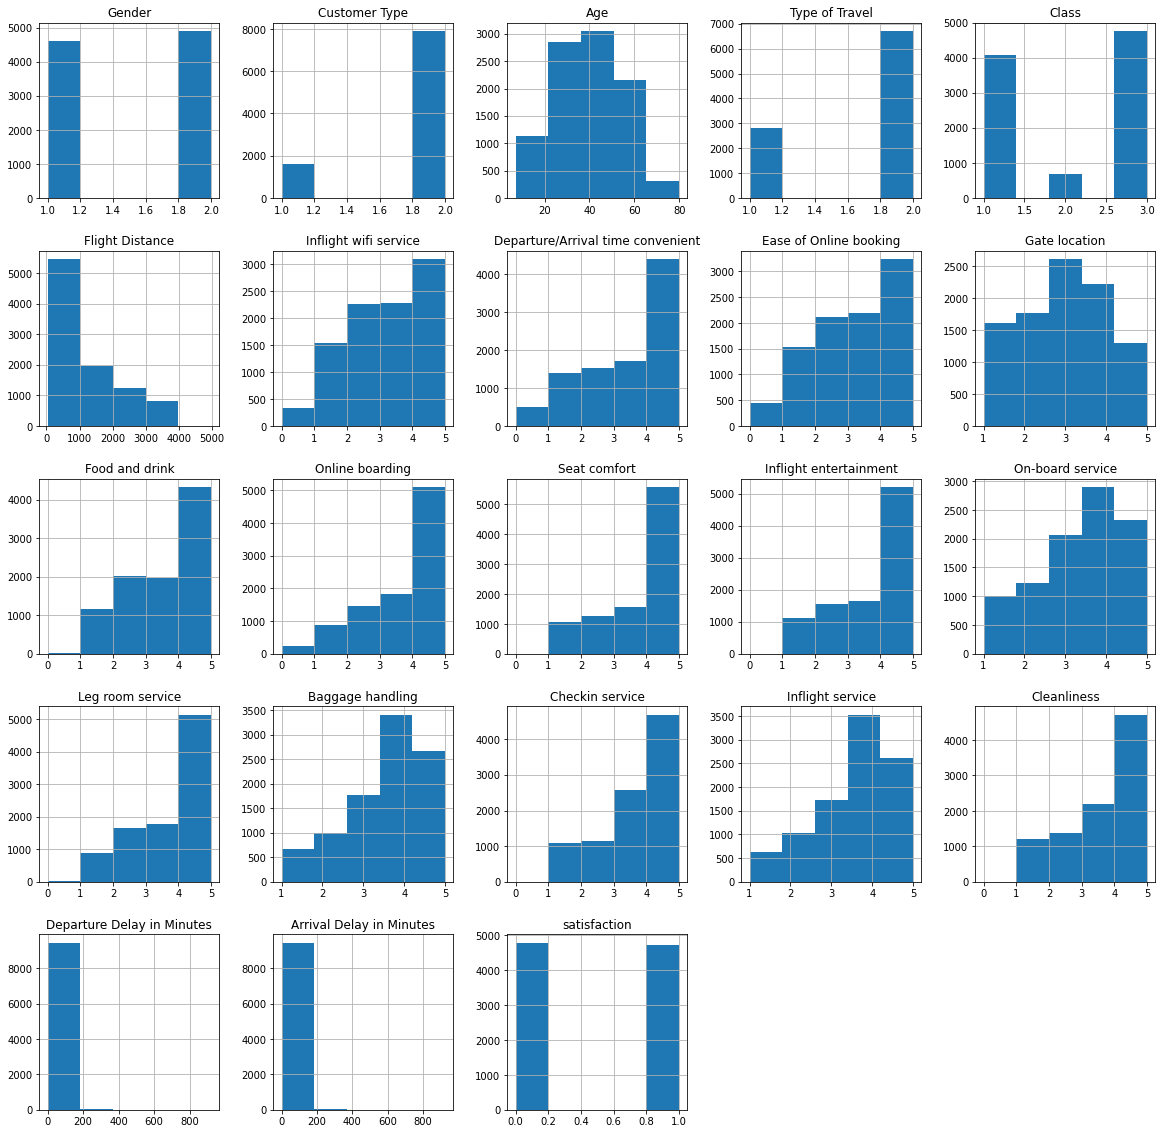

In [16]:
row_train.hist(figsize = (20, 20), bins = 5)

plt.show()



> quantile() orqali 'Departure Delay in Minutes' hamda 'Arrival Delay in Minutes' ustunlarini tarqoq hududlarini qisqartirmoqchi edim ammo yakunda bu umumiy modelga ta'siri kuchli bo'lmadi shuning uchun buni commentda qoldirdim



In [17]:
# q1 = row_train['Departure Delay in Minutes'].quantile(0.992)
# row_train = row_train[row_train['Departure Delay in Minutes'] < q1]

In [18]:
# q2 = row_train['Arrival Delay in Minutes'].quantile(0.995)
# row_train = row_train[row_train['Arrival Delay in Minutes'] < q2]
# row_train.head()



> Train datadan Labelni ajratib olamiz



In [19]:
X = row_train.drop('satisfaction', axis= 1)
y = row_train.satisfaction

In [20]:
X.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,...,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000
mean,1.515871,1.830986,39.370822,1.705382,2.072945,1229.935674,2.782846,3.073891,2.800294,2.983393,...,3.490330,3.403931,3.452701,3.416754,3.674164,3.357789,3.679840,3.314484,14.411078,14.648413
std,0.499774,0.374784,14.900369,0.455895,0.960996,1021.709952,1.358226,1.522978,1.417798,1.281120,...,1.312419,1.331704,1.275191,1.307804,1.189936,1.260052,1.173519,1.312077,38.693603,39.061861
min,1.000000,1.000000,7.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,27.000000,1.000000,1.000000,421.250000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,2.000000,2.000000,40.000000,2.000000,3.000000,866.500000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,2.000000,2.000000,51.000000,2.000000,3.000000,1801.750000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000
max,2.000000,2.000000,80.000000,2.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000


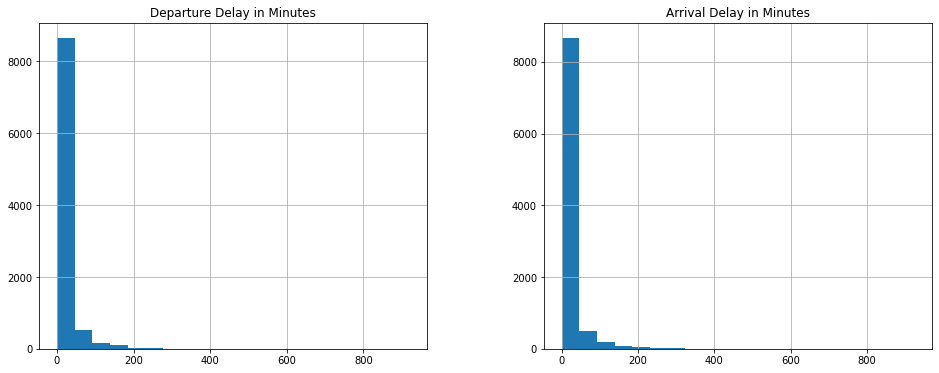

In [21]:
X[['Departure Delay in Minutes', "Arrival Delay in Minutes"]].hist(figsize = (16, 6), bins = 20)
plt.show()



> 'Departure Delay in Minutes' va 'Arrival Delay in Minutes' ustunlarni 10 minut kechikishgacha ijobiy undan uzoq muddatni salbiy guruhlab olamiz


In [22]:
X['Departure Delay in Minutes'] = pd.cut(X['Departure Delay in Minutes'], bins = [-1, 10, np.inf], labels = [0,-10]).astype(int)
X['Arrival Delay in Minutes'] = pd.cut(X['Arrival Delay in Minutes'], bins = [-1, 10, np.inf], labels = [0, -10]).astype(int)

In [23]:
X.dtypes

Gender                               int64
Customer Type                        int64
Age                                  int64
Type of Travel                       int64
Class                                int64
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
Departure Delay in Minutes           int64
Arrival Delay in Minutes             int64
dtype: object

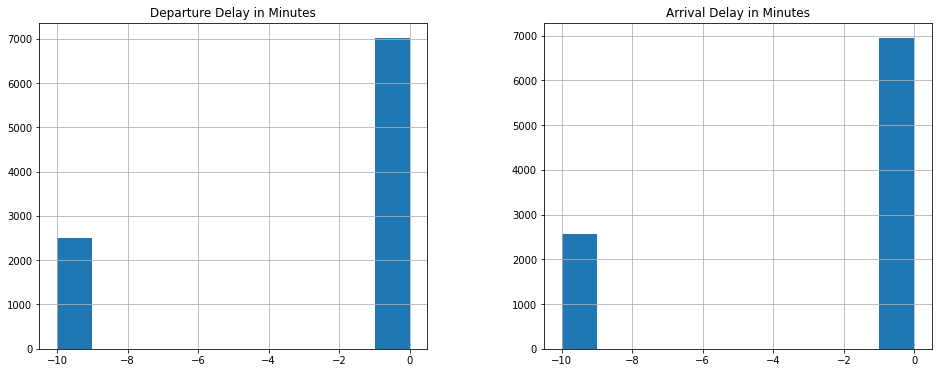

In [24]:
X[['Departure Delay in Minutes', "Arrival Delay in Minutes"]].hist(figsize = (16, 6))

plt.show()



> Korrelatsiyani ko'ramiz



In [25]:
X.corrwith(y).abs().sort_values(ascending = False)

Class                                0.521778
Online boarding                      0.503101
Type of Travel                       0.484177
Inflight entertainment               0.401330
Seat comfort                         0.343875
Leg room service                     0.324169
On-board service                     0.323564
Cleanliness                          0.312464
Flight Distance                      0.302166
Inflight wifi service                0.279029
Baggage handling                     0.246558
Inflight service                     0.240542
Checkin service                      0.232809
Food and drink                       0.211445
Customer Type                        0.178995
Ease of Online booking               0.165808
Age                                  0.141822
Arrival Delay in Minutes             0.099224
Departure/Arrival time convenient    0.068655
Departure Delay in Minutes           0.065825
Gate location                        0.009439
Gender                            



> datalarni standartlashtiramiz



In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### ML algoritmlari orqali klassifikatsiyani amalga oshiramiz bunda cross validationdan foydalanamiz va yakunda eng yaxshi natijaga ega model natijalarini olamiz



> LogisticRegression



In [27]:
model_log = LogisticRegression()

cross_log = cross_val_predict(model_log, X_scaled, y, cv = 5)

print(f" Accuracy: {accuracy_score(y, cross_log):.2f}\n")
print(f" Precision: {precision_score(y, cross_log):.2f}\n")
print(f" Recall: {recall_score(y, cross_log):.2f}\n")
print(f" Confusion matrix:\n {confusion_matrix(y, cross_log)}")


 Accuracy: 0.87

 Precision: 0.87

 Recall: 0.86

 Confusion matrix:
 [[4201  585]
 [ 676 4052]]




> Support Vector Machine



In [28]:
model_svc = SVC()

cross_svc = cross_val_predict(model_svc, X_scaled, y, cv = 5)

print(f" Accuracy: {accuracy_score(y, cross_svc):.2f}\n")
print(f" Precision: {precision_score(y, cross_svc):.2f}\n")
print(f" Recall: {recall_score(y, cross_svc):.2f}\n")
print(f" Confusion matrix:\n {confusion_matrix(y, cross_svc)}")

 Accuracy: 0.94

 Precision: 0.95

 Recall: 0.92

 Confusion matrix:
 [[4538  248]
 [ 362 4366]]




> DecisionTreeClassifier



In [29]:
model_tree = DecisionTreeClassifier()

cross_tree = cross_val_predict(model_tree, X_scaled, y, cv = 5)

print(f" Accuracy: {accuracy_score(y, cross_tree):.2f}\n")
print(f" Precision: {precision_score(y, cross_tree):.2f}\n")
print(f" Recall: {recall_score(y, cross_tree):.2f}\n")
print(f" Confusion matrix:\n {confusion_matrix(y, cross_tree)}")

 Accuracy: 0.92

 Precision: 0.92

 Recall: 0.92

 Confusion matrix:
 [[4416  370]
 [ 376 4352]]




> RandomForestClassifier



In [30]:
model_random = RandomForestClassifier(n_estimators = 100)

cross_random = cross_val_predict(model_random, X_scaled, y, cv = 5)

print(f" Accuracy: {accuracy_score(y, cross_random):.2f}\n")
print(f" Precision: {precision_score(y, cross_random):.2f}\n")
print(f" Recall: {recall_score(y, cross_random):.2f}\n")
print(f" Confusion matrix:\n {confusion_matrix(y, cross_random)}")

 Accuracy: 0.94

 Precision: 0.95

 Recall: 0.93

 Confusion matrix:
 [[4568  218]
 [ 315 4413]]




> XGBClassifier



In [31]:
model_xgb = XGBClassifier()

cross_xgb = cross_val_predict(model_xgb, X_scaled, y, cv = 5)

print(f" Accuracy: {accuracy_score(y, cross_xgb):.2f}\n")
print(f" Precision: {precision_score(y, cross_xgb):.2f}\n")
print(f" Recall: {recall_score(y, cross_xgb):.2f}\n")
print(f" Confusion matrix:\n {confusion_matrix(y, cross_xgb)}")

 Accuracy: 0.94

 Precision: 0.95

 Recall: 0.93

 Confusion matrix:
 [[4548  238]
 [ 345 4383]]




> GradientBoostingClassifier



In [32]:
from sklearn.ensemble import GradientBoostingClassifier

model_gmb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

cross_gmb = cross_val_predict(model_gmb, X_scaled, y, cv = 5)

print(f" Accuracy: {accuracy_score(y, cross_gmb):.2f}\n")
print(f" Precision: {precision_score(y, cross_gmb):.2f}\n")
print(f" Recall: {recall_score(y, cross_gmb):.2f}\n")
print(f" Confusion matrix:\n {confusion_matrix(y, cross_gmb)}")

 Accuracy: 0.94

 Precision: 0.95

 Recall: 0.93

 Confusion matrix:
 [[4548  238]
 [ 334 4394]]




> LightGBM


In [33]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train va test datalarni umumlashtiramiz
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

# LightGBM parametrlarini sozlaymiz
params = {'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric': 'binary_logloss',
          'num_leaves': 31,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.8,
          'bagging_freq': 5,
          'verbose': 0}

# train the LightGBM model
model = lgb.train(params, d_train, num_boost_round=100)

# make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.9469259064634787




> Eng yaxshi natijani RandomForestClassifier algoritmi ko'rsatmoqda. Shuning uchun ushbu model orqali yakuniy test set natijalarni predict qilamiz 



In [34]:
model_random_r = RandomForestClassifier()
model_random_r.fit(X_scaled, y)

RandomForestClassifier()

### Test datasetni yuklab preprocessing ishlarini amalga oshiramiz

In [35]:
row_test = pd.read_csv('/content/test_dataset.csv', index_col = 0)
row_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0


In [36]:
row_test.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64



> Test setda ham duplicat qiymatlar mavjud lekin ularni o'z holida qoldiramiz



In [37]:
# row_test.duplicated().sum()
# row_test.drop_duplicates(inp# lace=True)

In [38]:
row_test.fillna(row_test['Arrival Delay in Minutes'].median(), inplace=True)

In [39]:
row_test.Gender = row_test.Gender.map({'Male' : 1, 'Female' : 2})
row_test['Customer Type'] = row_test['Customer Type'].map({'disloyal Customer' : 1, 'Loyal Customer' : 2})
row_test['Type of Travel'] = row_test['Type of Travel'].map({'Business travel' : 2, 'Personal Travel' : 1})
row_test.Class = row_test.Class.map({'Eco' : 1, 'Eco Plus' : 2, 'Business' : 3})

In [40]:
row_test['Departure Delay in Minutes'] = pd.cut(row_test['Departure Delay in Minutes'], bins = [-1, 10, np.inf], labels = [0,-10]).astype(int)
row_test['Arrival Delay in Minutes'] = pd.cut(row_test['Arrival Delay in Minutes'], bins = [-1, 10, np.inf], labels = [0, -10]).astype(int)

In [41]:
row_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,2,2,25,1,1,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,-10,-10
2,2,2,49,2,3,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,-10,-10
3,1,2,51,2,3,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0
4,1,2,34,2,2,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0
5,1,2,34,1,1,602,4,4,4,3,...,5,5,4,5,4,5,5,5,-10,-10


In [42]:
test_scaled = scaler.fit_transform(row_test)
test_scaled

array([[ 1.00652126,  0.47485808, -1.00949875, ...,  1.25053935,
        -1.69365639, -1.64429429],
       [ 1.00652126,  0.47485808,  0.61798677, ..., -0.26503629,
        -1.69365639, -1.64429429],
       [-0.99352099,  0.47485808,  0.75361056, ...,  0.49275153,
         0.59043854,  0.60816364],
       ...,
       [-0.99352099,  0.47485808, -0.1279441 , ..., -1.02282411,
        -1.69365639, -1.64429429],
       [-0.99352099,  0.47485808, -1.14512254, ...,  1.25053935,
         0.59043854,  0.60816364],
       [ 1.00652126, -2.10589235, -1.00949875, ..., -1.78061193,
        -1.69365639, -1.64429429]])

In [43]:
prediction = model_random_r.predict(test_scaled)
prediction

array([0, 1, 1, ..., 0, 1, 0])

### Yakuniy Submission fileni yuklab ushbu predictionni saqlab olamiz 

In [44]:
sample_submission = pd.read_csv('/content/sample_submission.csv', index_col = 0)
sample_submission.head()

,satisfaction
id,
1,0
2,0
3,0
4,0
5,0


In [45]:
# for i in sample_submission.index:
#   if i in new_test.index:
#     sample_submission.loc[i] = new_test.at[i, 0]

In [46]:
sample_submission.satisfaction = prediction
sample_submission.to_csv('sample_submission_rand_last.csv')
sample_submission.head()

,satisfaction
id,
1,0
2,1
3,1
4,1
5,0
